In [274]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from safe_learner import SafeActiveLearner
import configs as cfg
%load_ext autoreload 
%autoreload 2

x_init = cfg.DOMAIN[cfg.INITIAL_SAFE_INDICES]
y_init = cfg.ground_truth_function(x_init) + 0.01 * torch.randn(1) # Adding noise_std=0.01
# y_init = y_init.squeeze()
# print(y_init.shape)


# 4. Initialize Learner
# Using parameters from main.py __main__ block
learner = SafeActiveLearner()

# Load initial data
learner.add_data(x_init, y_init)
j = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [275]:
# --- fit gp
# j = -5 
while j < 10:

        # --- select next point
    x_next, idx_next, cubes  = learner.step()
    print(f"Selected next point: {x_next.item():.4f}")

    y_next = cfg.ground_truth_function(x_next) + 0.05 * torch.randn(1)
    y_next = y_next.flatten()

    learner.add_data(x_next, y_next)
j+=1

Getting PAC bounds now...
Updated B: 6.4301
 Global Cube Safe RMSE: 0.8342
Selected next point: 0.1055
Getting PAC bounds now...
Updated B: 6.7523
 Global Cube Safe RMSE: 0.7850
Selected next point: 0.7085
Getting PAC bounds now...
Updated B: 6.5311
 Global Cube Safe RMSE: 0.7798
Selected next point: 0.7186
Getting PAC bounds now...
Updated B: 6.2645
 Global Cube Safe RMSE: 0.7723
Selected next point: 0.6935
Getting PAC bounds now...
Updated B: 6.1152
 Global Cube Safe RMSE: 0.7618
Selected next point: 0.6834
Getting PAC bounds now...
Updated B: 6.6773
 Global Cube Safe RMSE: 0.7488
Selected next point: 0.7286
Getting PAC bounds now...
Updated B: 6.5867
 Global Cube Safe RMSE: 0.7715
Selected next point: 0.7387
Getting PAC bounds now...
Updated B: 6.3142
 Global Cube Safe RMSE: 0.7464
Selected next point: 0.7487
Getting PAC bounds now...
Updated B: 6.1505
 Global Cube Safe RMSE: 0.7661
Selected next point: 0.7588
Getting PAC bounds now...
Updated B: 5.7651
 Global Cube Safe RMSE: 0.733

AttributeError: 'NoneType' object has no attribute 'item'

In [ ]:
train_x, train_y = learner.get_data()
for i in range(len(train_x)): 
    if train_x[i] and cfg.ground_truth_function(train_x[i]) < cfg.SAFE_THRESHOLD : 
        print(f"below threshold{train_x[i]}")



In [ ]:
# x_next = torch.tensor([[1]])
# y_next = cfg.ground_truth_function(x_next) + 0.05 * torch.randn(1)

# learner.add_data(x_next, y_next)


1


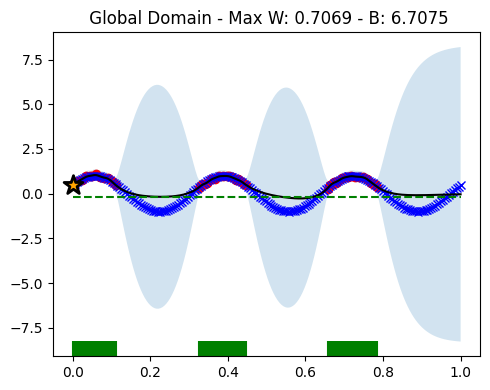

In [ ]:
n = len(cubes) 
n_cols = min(3, n)
n_rows = (n + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
if n > 1 : axes = axes.flatten()  
else : axes = [axes] 
print(n)   
for idx, cube in enumerate(cubes):
    cube.plot(axes[idx], cube.cube_id)

# Hide unused subplots
for idx in range(n, len(axes) if isinstance(axes, list) else len(axes.flatten())):
    if isinstance(axes, list):
        axes[idx].axis('off')
    else:
        axes.flatten()[idx].axis('off')
        

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
mean, cov = learner.get_posterior_mean_var()
S_mask, Q_lower, Q_upper = learner.get_safe_set_and_bounds()
plt.figure(figsize=(10,6))
ax = plt.gca()
trans = ax.get_xaxis_transform()
safe_x = cfg.DOMAIN[S_mask]
ax.scatter(
        safe_x,
        np.full_like(safe_x, 0.02),  
        marker='|',
        color='green',
        s=150,                     
        label='Safe Points',
        transform=trans           
    )
plt.plot(train_x.numpy(), train_y.numpy(), 'ro', label='Training Data')
plt.plot(cfg.DOMAIN.numpy(), cfg.ground_truth_function(cfg.DOMAIN).numpy(), 'bx--', label='Ground Truth')
plt.plot(cfg.DOMAIN.numpy(), mean.detach().numpy(), 'k-', label='GP Mean')
plt.plot(cfg.DOMAIN.numpy(), cfg.SAFE_THRESHOLD * torch.ones_like(cfg.DOMAIN).numpy(), 'g--', label='Safety Threshold')
plt.fill_between(cfg.DOMAIN.numpy().flatten(), Q_lower.detach().numpy(), Q_upper.detach().numpy(), alpha=0.2, label='Q Bounds')

AttributeError: 'SafeActiveLearner' object has no attribute 'get_posterior_mean_var'

In [ ]:
# plot 
# --- STEP 5: Visualization ---
plt.figure(figsize=(12, 6))

# Plot Uncertainty Bounds (LCB/UCB)
plt.fill_between(
    cfg.domain.flatten().numpy(), 
    learner.lcb.detach().numpy(), 
    learner.ucb.detach().numpy(), 
    color='blue', alpha=0.2, label='Confidence Interval (SafeOpt bounds)'
)
plt.plot(cfg.domain.numpy(), learner.mean.detach().numpy(), 'b-', label='GP Mean')

# Plot Safe Threshold
plt.axhline(y=cfg.SAFE_THRESHOLD, color='r', linestyle='--', label='Safety Threshold')

# Plot Safe Set (Green dots on the threshold line)
safe_indices = learner.S.numpy()
plt.scatter(
    cfg.domain[safe_indices], 
    np.full(sum(safe_indices), cfg.SAFE_THRESHOLD), 
    color='green', s=1, marker='|', label='Safe Set (St)'
)

# Plot Observed Data
plt.scatter(learner.x_sample[:-1], learner.y_sample[:-1], c='black', marker='x', label='Previous Data')
plt.scatter(x_next, y_next, c='red', marker='*', s=150, zorder=10, label='Latest Query')

plt.title(f"Iter: {len(learner.y_sample)} | Est. RKHS Norm (B): {learner.B:.4f} | Beta: {learner.beta.item():.2f}")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

AttributeError: module 'configs' has no attribute 'domain'

<Figure size 1200x600 with 0 Axes>